## Data
- PosterLink: Link of the poster that imdb using
- SeriesTitle: Name of the movie
- ReleasedYear: Year at which that movie released
- Certificate: Certificate earned by that movie
- Runtime: Total runtime of the movie
- Genre: Genre of the movie
- IMDB Rating: Rating of the movie at IMDB site
- Overview: mini story/ summary
- Meta_score: Score earned by the movie
- Director: Name of the Director
- Star1,Star2,Star3,Star4: Name of the Stars
- No of votes: Total number of votes
- Gross: Money earned by that movie

### IMDB Dataset of top 1000 movies and tv shows.

## Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = r'D:\Python\10.EDA\IMDB Movie\imdb_top_1000.csv'
data = pd.read_csv(path)

#### Searching a movie

In [4]:
search_title = "Taare Zameen Par"

# Perform the search
result = data['Series_Title'][data['Series_Title'].str.contains(search_title, case=False)]

# Display the result
print(result)

65    Taare Zameen Par
Name: Series_Title, dtype: object


## Shape of the data

In [5]:
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


## Quick view of data

In [6]:
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


### **Renaming the Column**

In [9]:
data = data.rename(columns={"Series_Title": "Movies_Title"})

In [10]:
data.head(1)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


### **Removing Unnessory column**

In [11]:
data = data.drop('Poster_Link', axis=1)
data.head(2)

,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


### **Number of null values**

In [12]:
data.isnull().sum()

Movies_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### **Imputation**

In [13]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1))

data['Gross'] = data['Gross'].astype('float64')
data['Gross'] = data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [14]:
data['Gross'] = data['Gross'].astype(int)
print(data['Gross'].dtype)

int32


In [15]:
data['Meta_score'] = data['Meta_score'].replace(np.nan)

In [16]:
data['Certificate']=data['Certificate'].fillna('Not Rated')

In [17]:
data.isnull().sum()

Movies_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### **Visualizing the Values** 

In [18]:
certificates=data['Certificate'].value_counts()

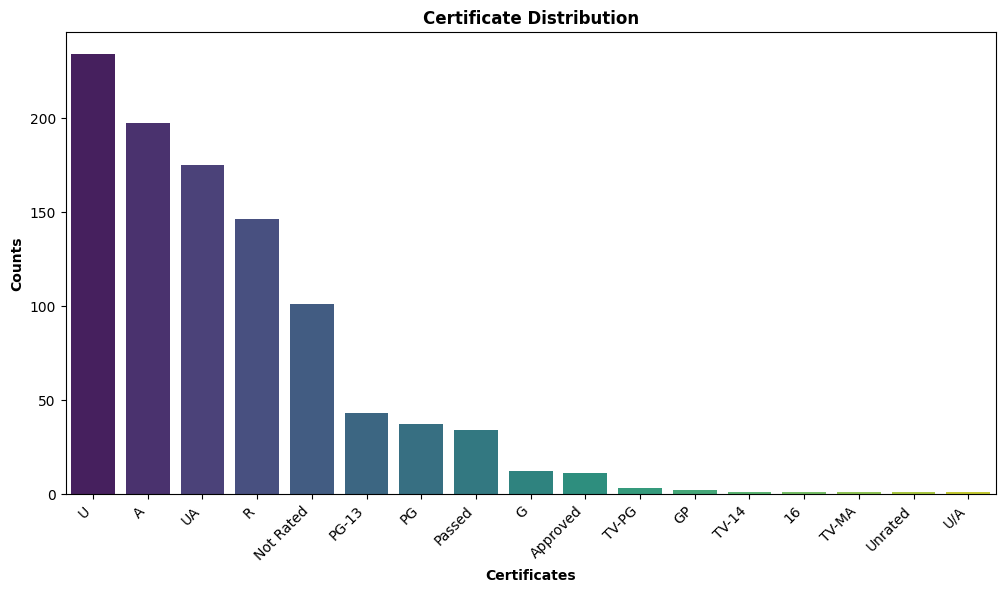

In [82]:
fig, axs = plt.subplots(figsize=(12, 6))
g = sns.barplot(x=certificates.index, y=certificates.values, palette="viridis")
g.set_ylabel("Counts", weight="bold")
g.set_xlabel("Certificates", weight="bold")
g.set_title("Certificate Distribution", weight="bold")
plt.xticks(rotation=45, ha="right")
plt.show()

## Finding correlation

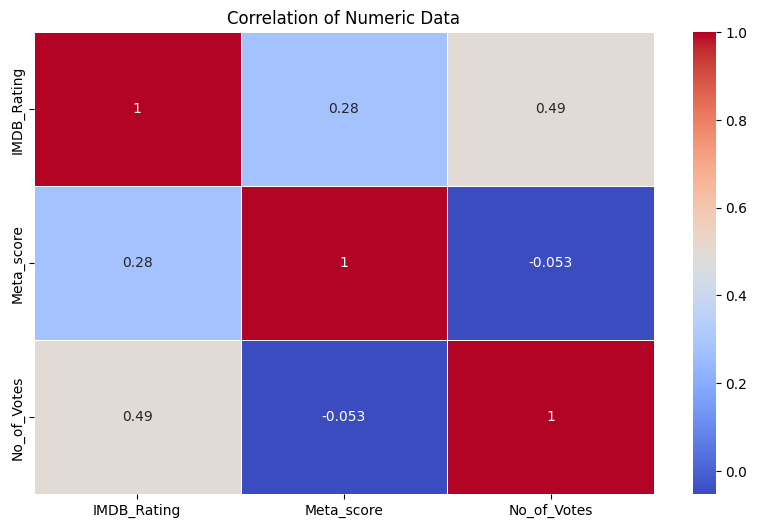

In [19]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Sayısal değerlerin korelasyon matrisini oluştur
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Numeric Data')
plt.show()

In [20]:
data.describe(include = ['O'])

,Movies_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,999,100,17,140,202,1000,548,660,841,891,939
top,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,2,32,234,23,85,1,14,12,7,5,4


### **Top voted movies**

In [21]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)

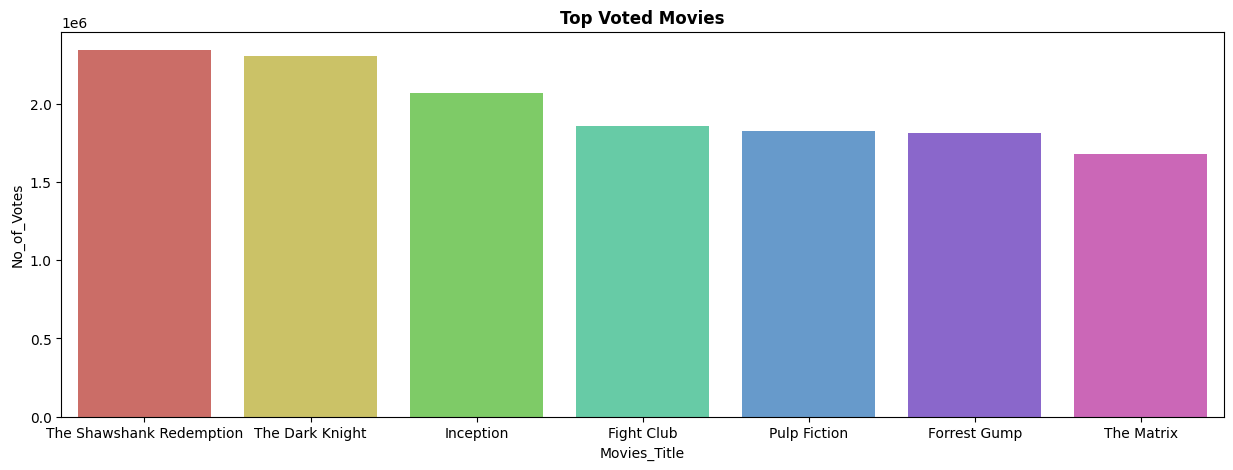

In [22]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

### **Top voted movies ratings**

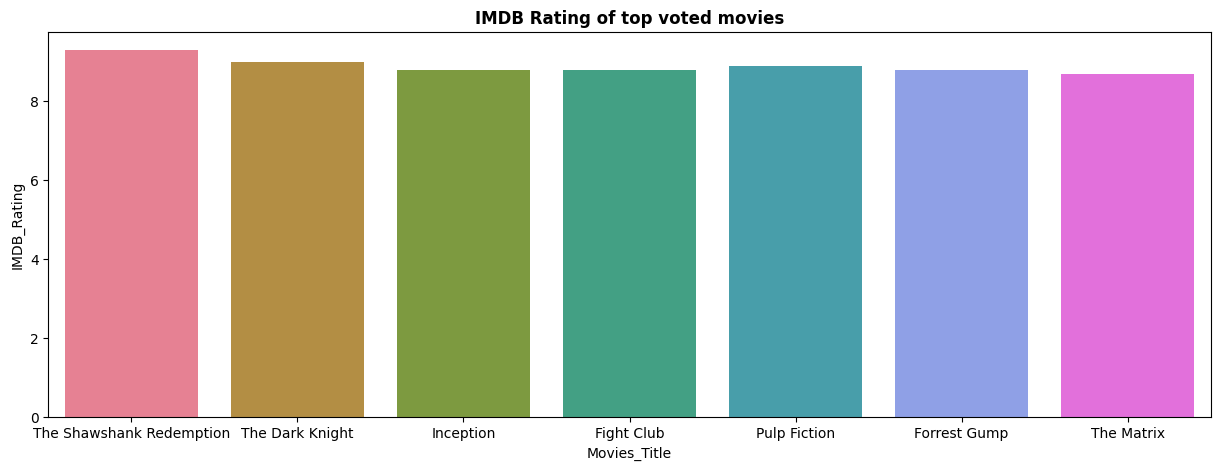

In [23]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

### **Top voted movies metascores**

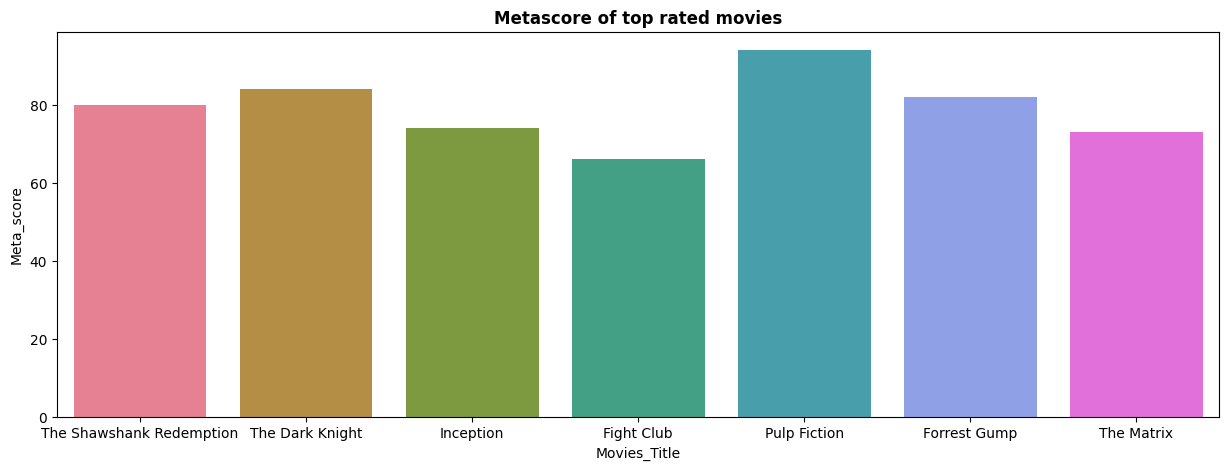

In [88]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [89]:
data.loc[data['Gross']==0].head(1)

,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,0


### **Gross of top rated movies**

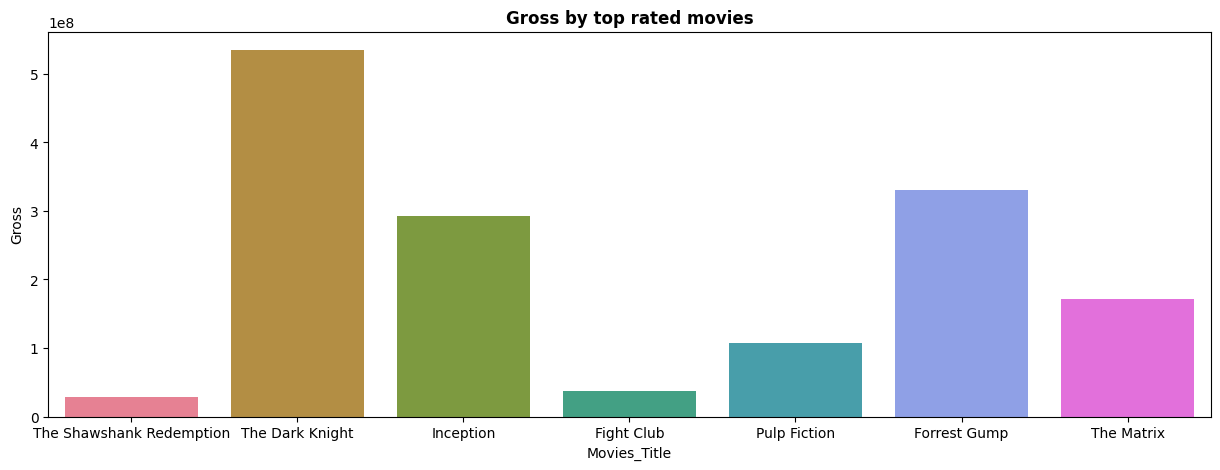

In [90]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

### **Top movies by Gross**

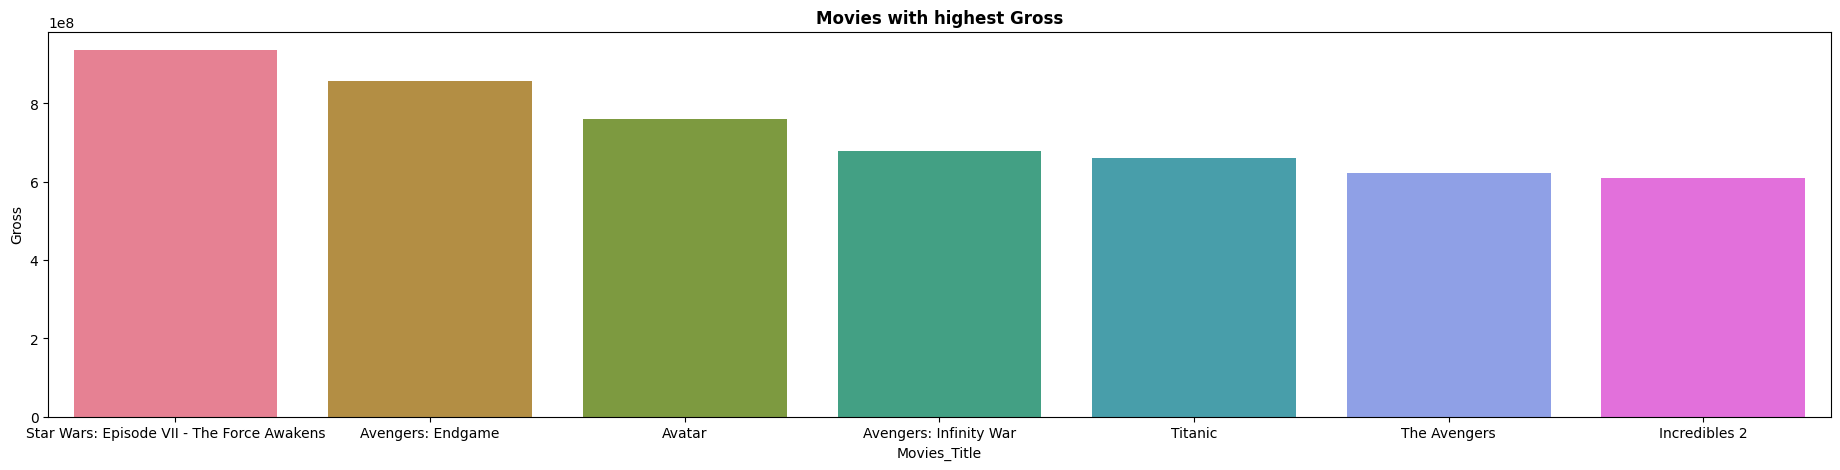

In [91]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Movies_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

### **Maximum movies released in-**

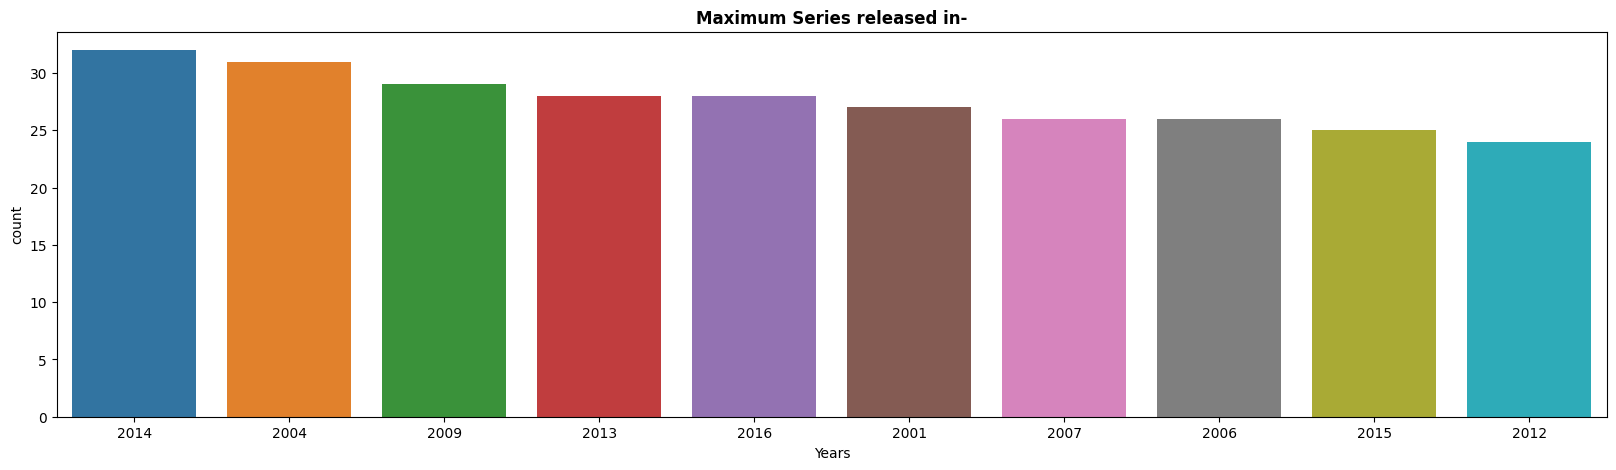

In [92]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Released_Year'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

### Mostly occurred Directors

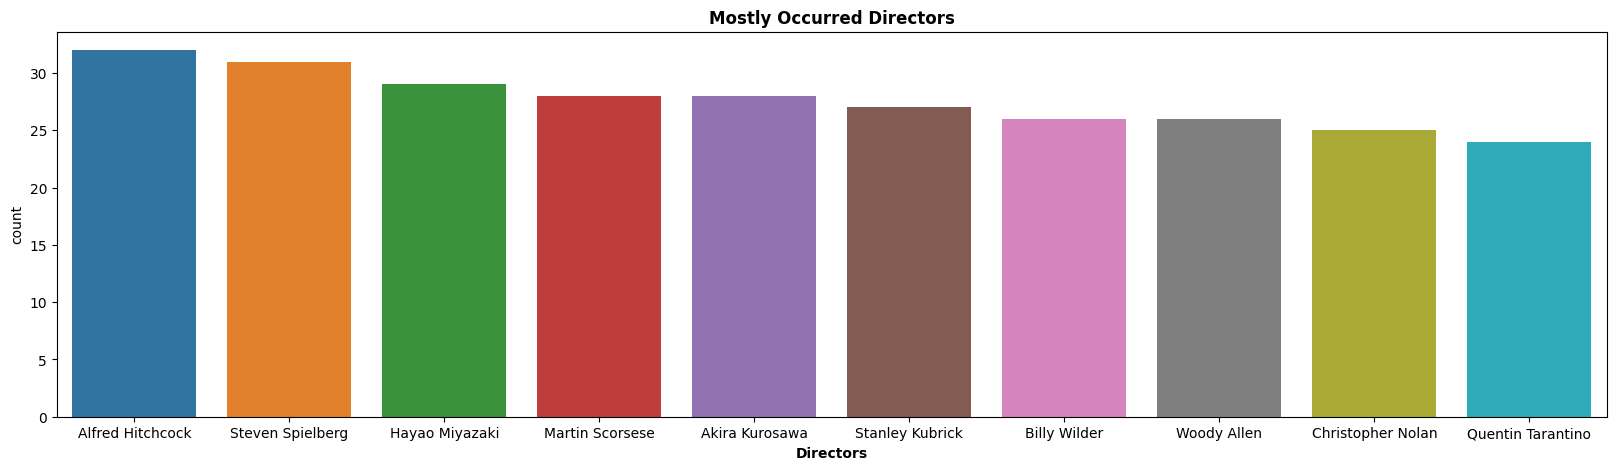

In [93]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### **Directors with respect to Gross of the movies**

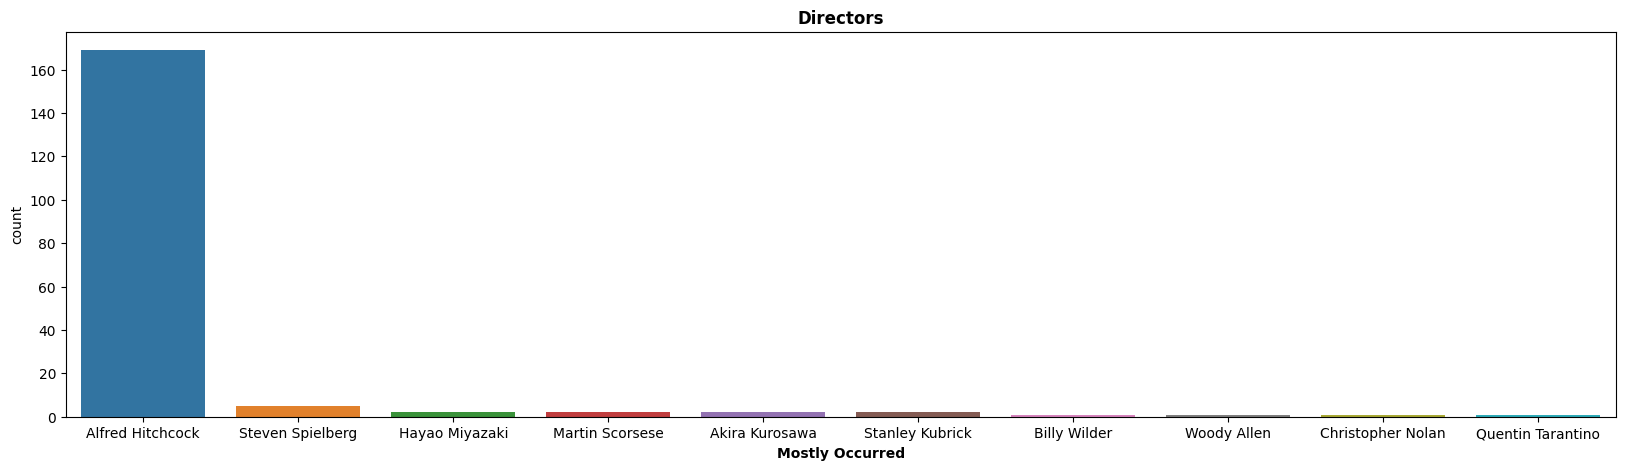

In [94]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Gross'].value_counts()[:10])
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

### **Runtime of the movies**

In [95]:
import re
duration=[]
for x in data["Runtime"]:
    p=re.compile('\d+')
    j=p.findall(x)
    if len(j)==2:
        duration.append(int(j[1])-int(j[0])+1)
    else:
        duration.append(int(j[0])+1)
data['duration']=duration

In [96]:
data[['Movies_Title','duration']].head()

,Movies_Title,duration
0,The Shawshank Redemption,143
1,The Godfather,176
2,The Dark Knight,153
3,The Godfather: Part II,203
4,12 Angry Men,97


Text(0.5, 1.0, 'Time Duration of movies')

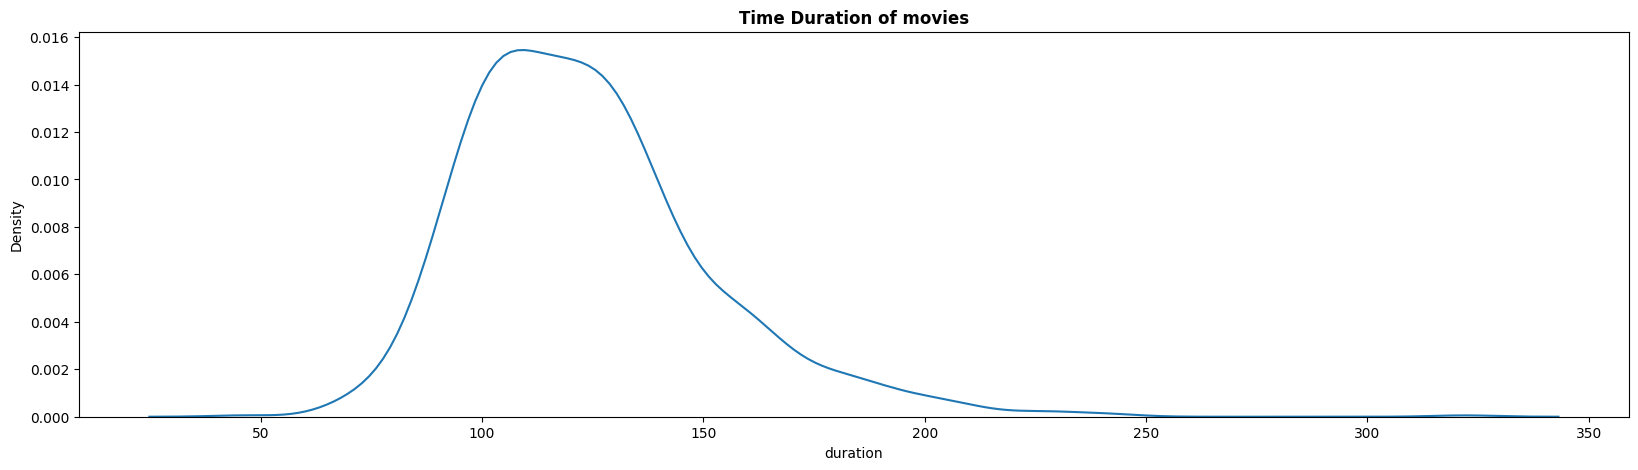

In [97]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(data['duration'])
g.set_title("Time Duration of movies", weight = "bold")

### **Appearances of Stars in Top voted movies**

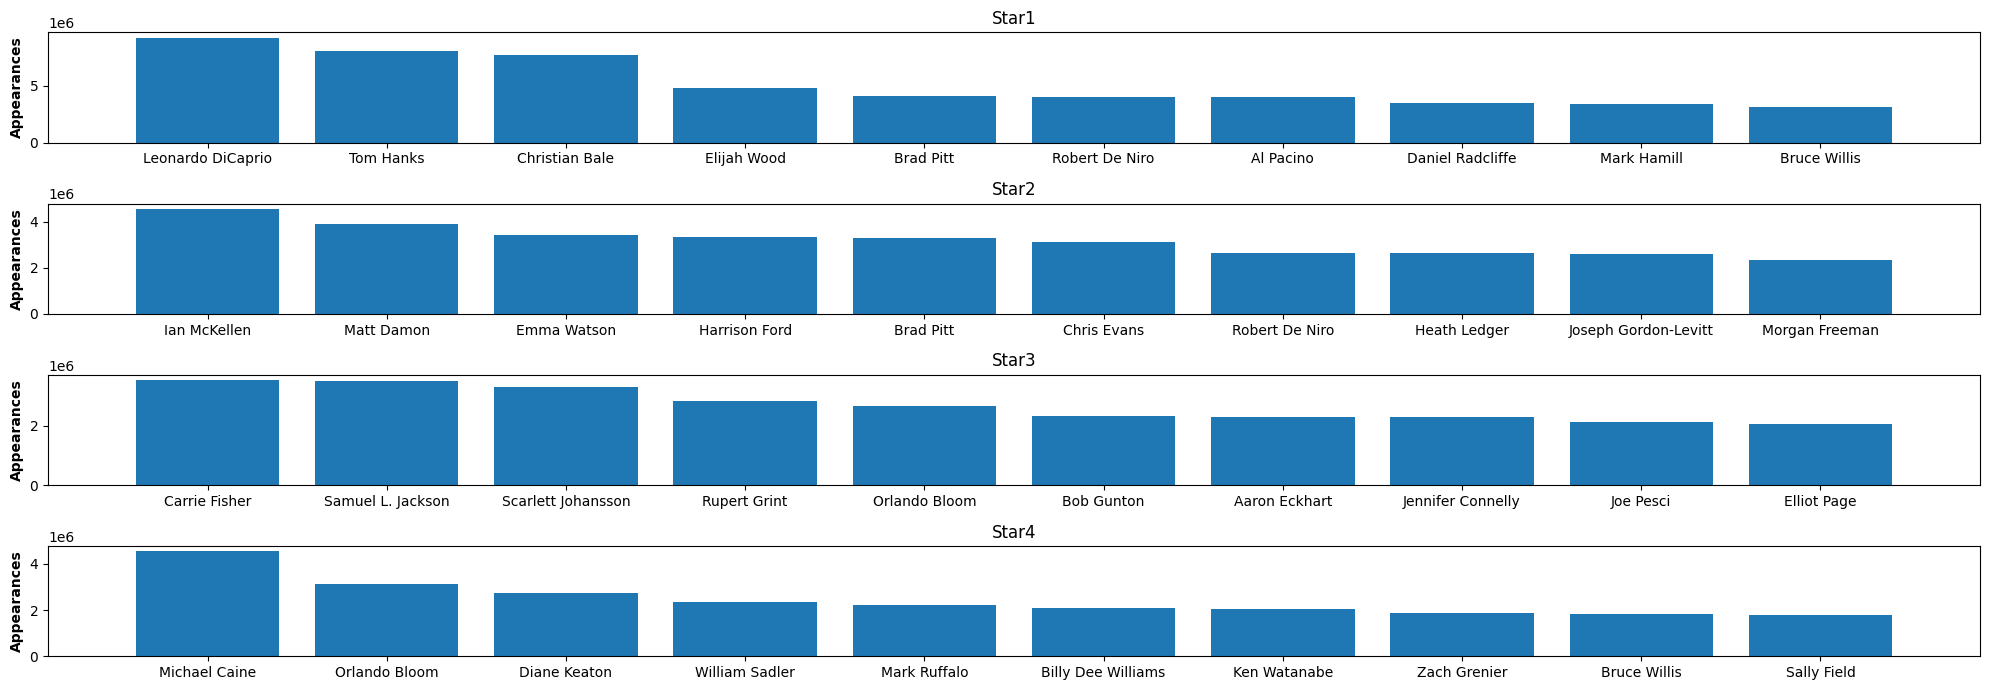

In [98]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### **Appearances of Stars in top rated movies**

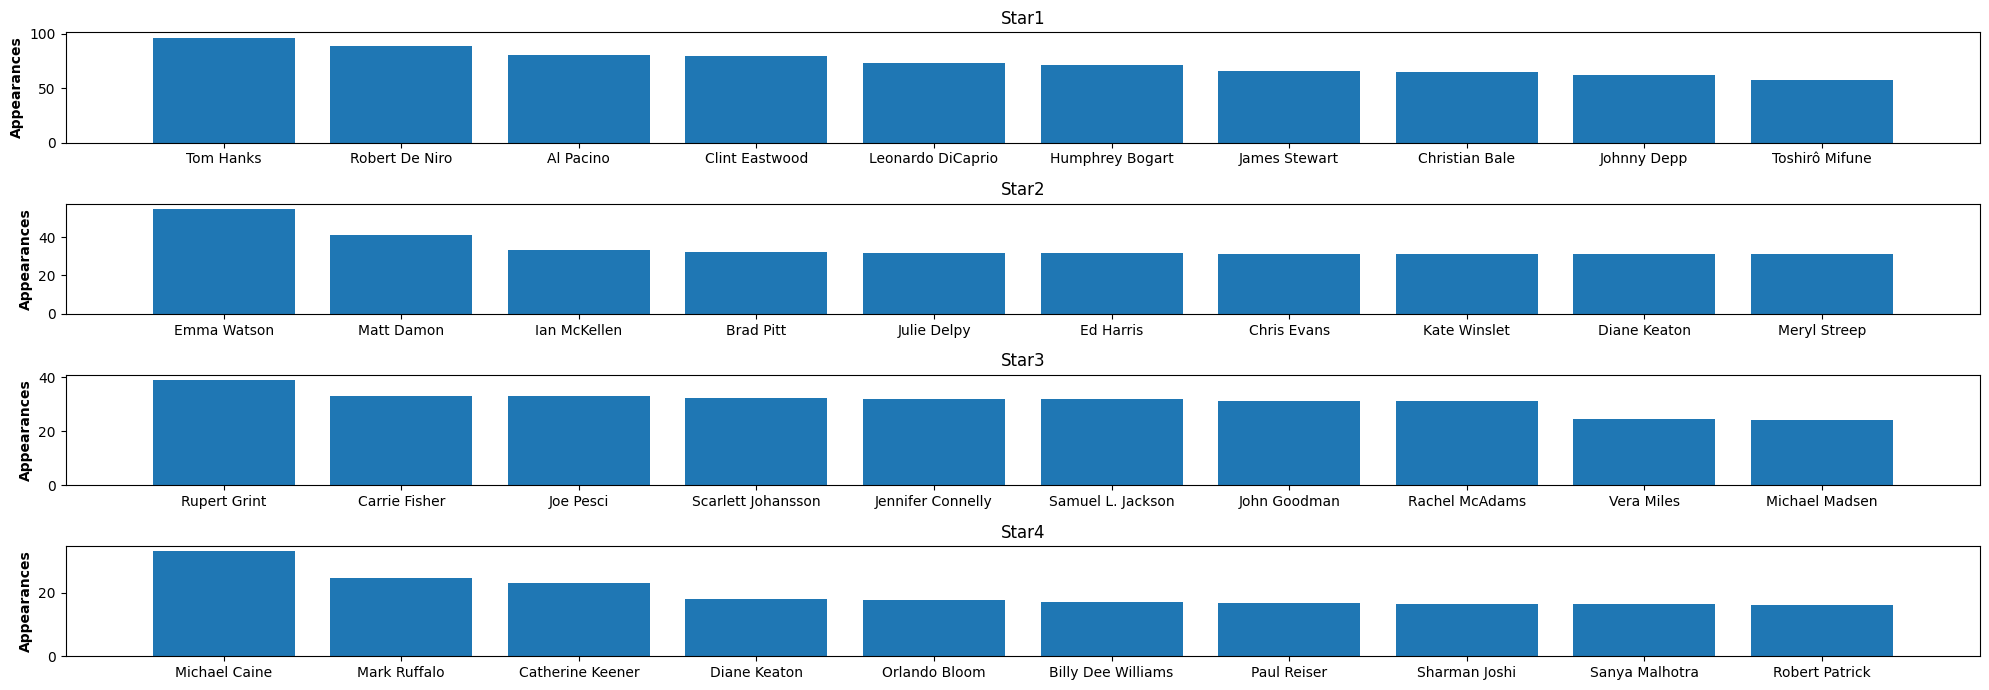

In [99]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['IMDB_Rating'],ascending=False)[:10]
    axs[ax].bar(d[x],d['IMDB_Rating'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### **IMDB Rating Distribution**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12924\1015228056.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(data['IMDB_Rating'],bins=30)


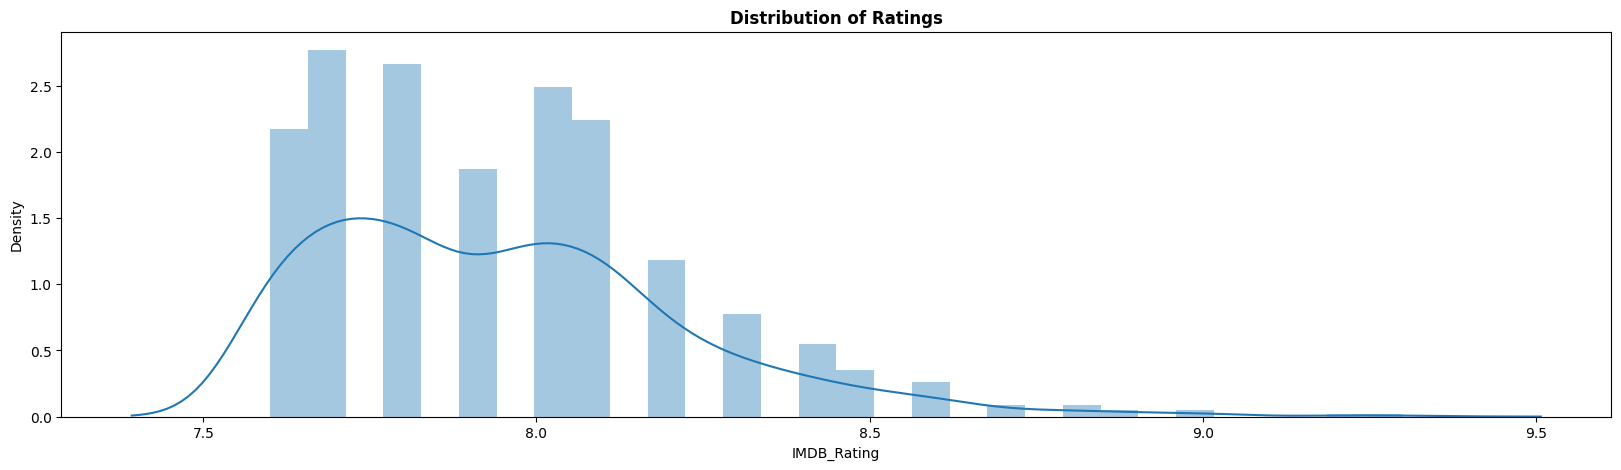

In [100]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

## **Total Gross By Years**

In [101]:
total_gross_by_year = data.groupby('Released_Year')['Gross'].sum()

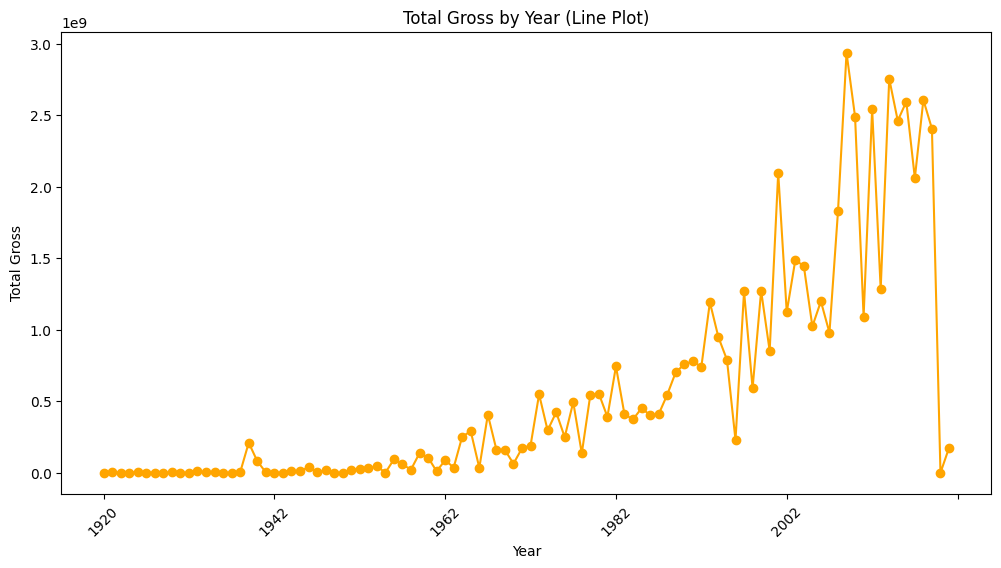

In [102]:
plt.figure(figsize=(12, 6))
total_gross_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Total Gross by Year (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)

plt.show()

### Top 10 Genres

In [103]:
data[data['Genre']== 'Drama'].head()

,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,duration
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,143
9,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102,140
17,One Flew Over the Cuckoo's Nest,1975,A,133 min,Drama,8.7,A criminal pleads insanity and is admitted to ...,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000,134
20,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",96.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0,154
40,American History X,1998,R,119 min,Drama,8.5,A former neo-nazi skinhead tries to prevent hi...,62.0,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864,120


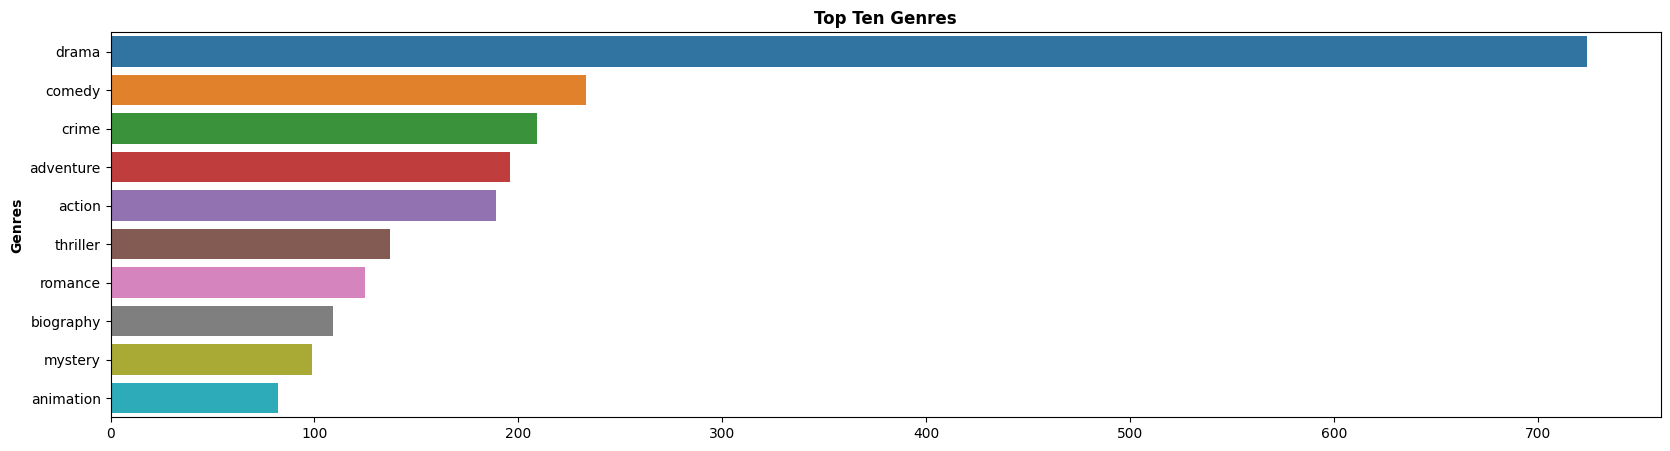

In [104]:
from collections import Counter

genre = []
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:10]
x, y = zip(*count)

fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=list(y), y=list(x))
g.set_ylabel("Genres", weight="bold")
g.set_title("Top Ten Genres", weight="bold")
plt.show()
